### Cleaning the rf-chess-data v1 training set


In [2]:
from fastai2.vision.all import *
import sys
sys.path.append('..')

##### Step1 build a fresh model

In [8]:
from modules.expbuilder import default_params, run_exp

In [11]:
new_params = {'_train_seed':42, '_bs':16}
my_params = default_params.copy()
my_params.update(new_params)

In [13]:
learn = run_exp(my_params, "demo")

starting training...


saving to name_base: demo-0
Finished with:

{'valid_loss': 0.07824108749628067, 'accuracy': 0.99303138256073}
{'test_loss': 0.5765987634658813, 'test_accuracy': 0.8201754093170166}


finished in 426.71 secs



##### Step2 check that you've caught some mis-labelled images in your web
Note: these are are from ds_idx=2, by popping off the TestSetRecorder, everything works below.

In [16]:
interp = ClassificationInterpretation.from_learner(learn, ds_idx=1)

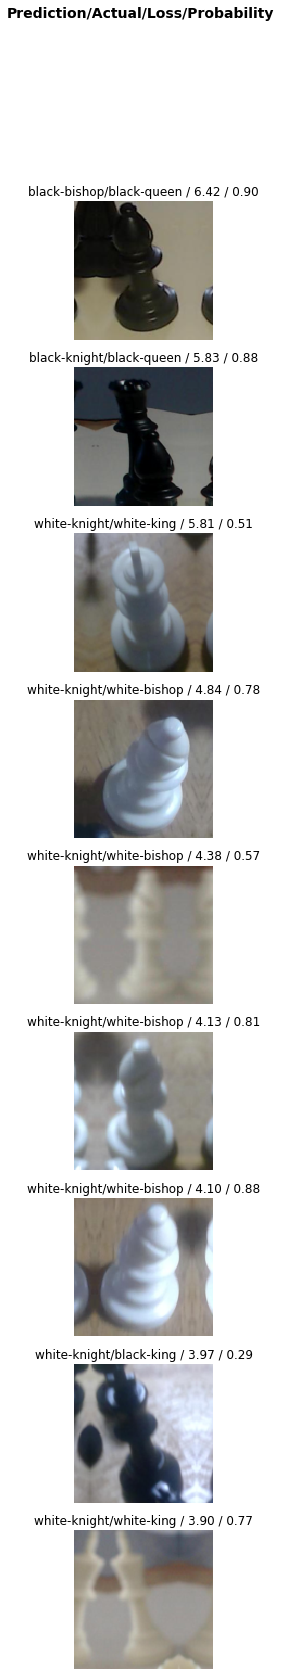

In [17]:
interp.plot_top_losses(9, nrows=9)

In [27]:
learn.cbs.pop(3)

TestSetRecorder

##### Step3 - import and run the Cleaner widget

In [ ]:
from fastai2.vision.widgets import *

In [28]:
cleaner = ImageClassifierCleaner(learn)

In [29]:
cleaner

##### Step 4 - use the cells below to build up `fn`'s change labels for any mis-labeled data you find

In [ ]:
changes = []

In [76]:
tmp = [(cleaner.fns[i].name, e) for i, e in cleaner.change()]
tmp

[('00223_white-rook.jpg', 'black-rook'),
 ('00224_white-rook.jpg', 'black-rook'),
 ('01346_white-rook.jpg', 'white-knight'),
 ('01712_white-rook.jpg', 'white-knight'),
 ('01711_white-rook.jpg', 'white-knight')]

In [77]:
changes.extend(tmp.copy())

In [78]:
changes

[('01155_black-bishop.jpg', 'black-knight'),
 ('00392_black-bishop.jpg', 'black-rook'),
 ('00393_black-bishop.jpg', 'black-rook'),
 ('01154_black-bishop.jpg', 'black-knight'),
 ('02398_black-bishop.jpg', 'white-bishop'),
 ('00847_black-knight.jpg', 'black-bishop'),
 ('00552_black-knight.jpg', 'black-king'),
 ('02621_black-knight.jpg', 'black-bishop'),
 ('01594_black-rook.jpg', 'black-knight'),
 ('00928_black-rook.jpg', 'black-knight'),
 ('00927_black-rook.jpg', 'black-knight'),
 ('01877_black-rook.jpg', 'white-rook'),
 ('00513_white-bishop.jpg', 'white-rook'),
 ('01302_white-knight.jpg', 'black-knight'),
 ('02627_white-knight.jpg', 'black-knight'),
 ('02626_white-knight.jpg', 'black-knight'),
 ('01235_white-queen.jpg', 'white-king'),
 ('00223_white-rook.jpg', 'black-rook'),
 ('00224_white-rook.jpg', 'black-rook'),
 ('01346_white-rook.jpg', 'white-knight'),
 ('01712_white-rook.jpg', 'white-knight'),
 ('01711_white-rook.jpg', 'white-knight')]

##### Step 5 - use the `changes` list to alter the filenames on disk, preferrably to a copied dataset

In [79]:
import os

In [96]:
path = Path('../../../rf-chess-data/cropped_v1.1/')

In [97]:
def new_fn(fn, new_class):
    ret = fn.split('_')[0]
    ret += '_'
    ret += new_class
    ret += '.jpg'
    return ret

In [98]:
for i, _ in enumerate(changes):
    src = path / changes[i][0]
    dst = path / new_fn(changes[i][0], changes[i][1])
    os.rename(src, dst)